founder: Dirk Derichsweiler, Contributors: Vincent Charbonnier and Isabelle Steinhauser, September 2023
# Spark
This chapter will delve into the process of creating a Spark using HPE Ezmeral Unified Analytics Software Platform.

Ezmeral Unified Analytics offers Spark Interactive Sessions as well as Spark Applications. In this chapter we will walk through the deployment of a Spark Appplication. Therefore let's head to the Spark Application part of EZUA: 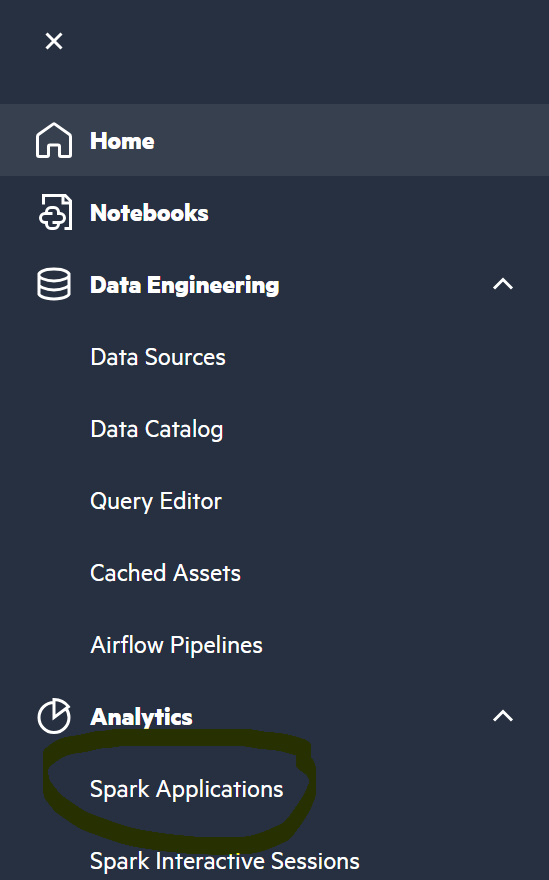

Click on Create Application in the upper right in order to create a new one. Give it a name you prefer.

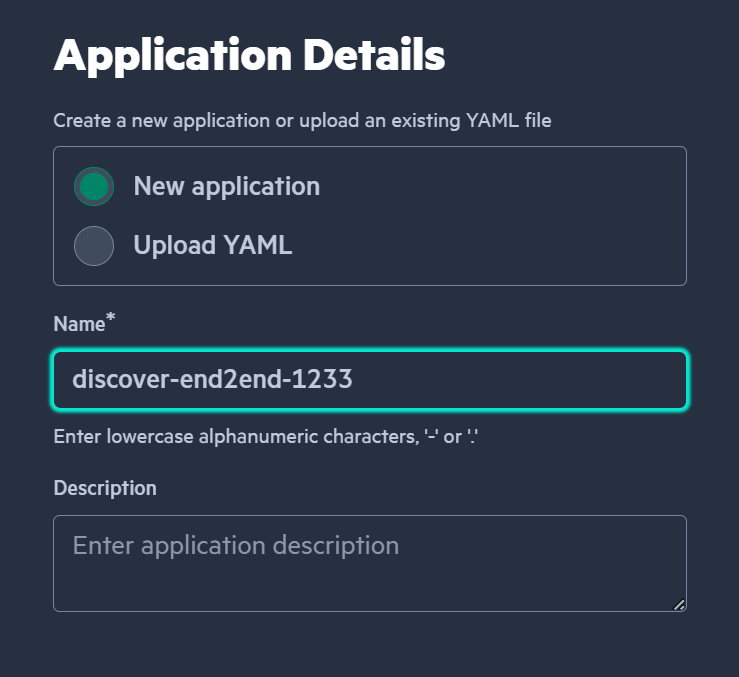

Adapt the following example according to your environment (edit __url__, __user__, __password__ as well the database names in the __query__) and save it in EZUA as .py file.
```python
from pyspark.sql import SparkSession

if __name__ == "__main__":
    print("pyspark session started..")
    spark = SparkSession.builder \
        .appName("demo") \
        .getOrCreate()

    sc = spark.sparkContext

    df = spark.read \
      .format("jdbc") \
      .option("driver", "com.facebook.presto.jdbc.PrestoDriver") \
      .option("url", "jdbc:presto://ezpresto.ezua-cb.ezmeral.demo.local:443") \
      .option("user", "demo-user") \
      .option("password", "Hpepoc@123") \
      .option("SSL", "true") \
      .option("IgnoreSSLChecks", "true") \
      .option("query", "SELECT * FROM czech_mysql_store1.discover.czech UNION ALL SELECT * FROM german_mysql_store1.discover.germany UNION ALL ( SELECT PRODUCTID , PRODUCT , TYPE , UNITPRICE , UNIT , QTY , TOTALSALES , CURRENCY , STORE , (CASE WHEN (country = 'Swiss') THEN 'Switzerland' ELSE country END) COUNTRY , YEAR FROM swiss_mariadb_store1.discover.swiss )") \
      .load() 
    df.show()
 ```

Choose __Python__ as Type. You can choose between Shared Directory, User Directory and S3 as Source. With Browse you can browse in these folders. Select according to where you saved your sparkjob file.

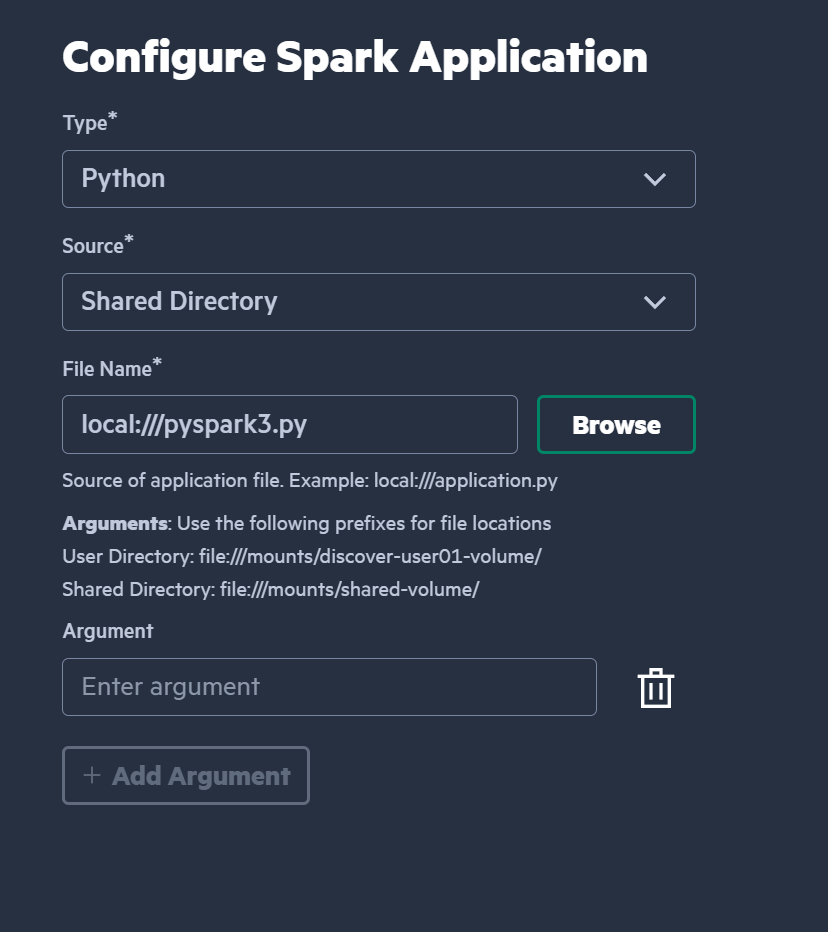

We don't have any dependencies so you can leave that page empty and continue with the next one. For the driver Configuration 1 Core and 1M as ressources should be sufficient.  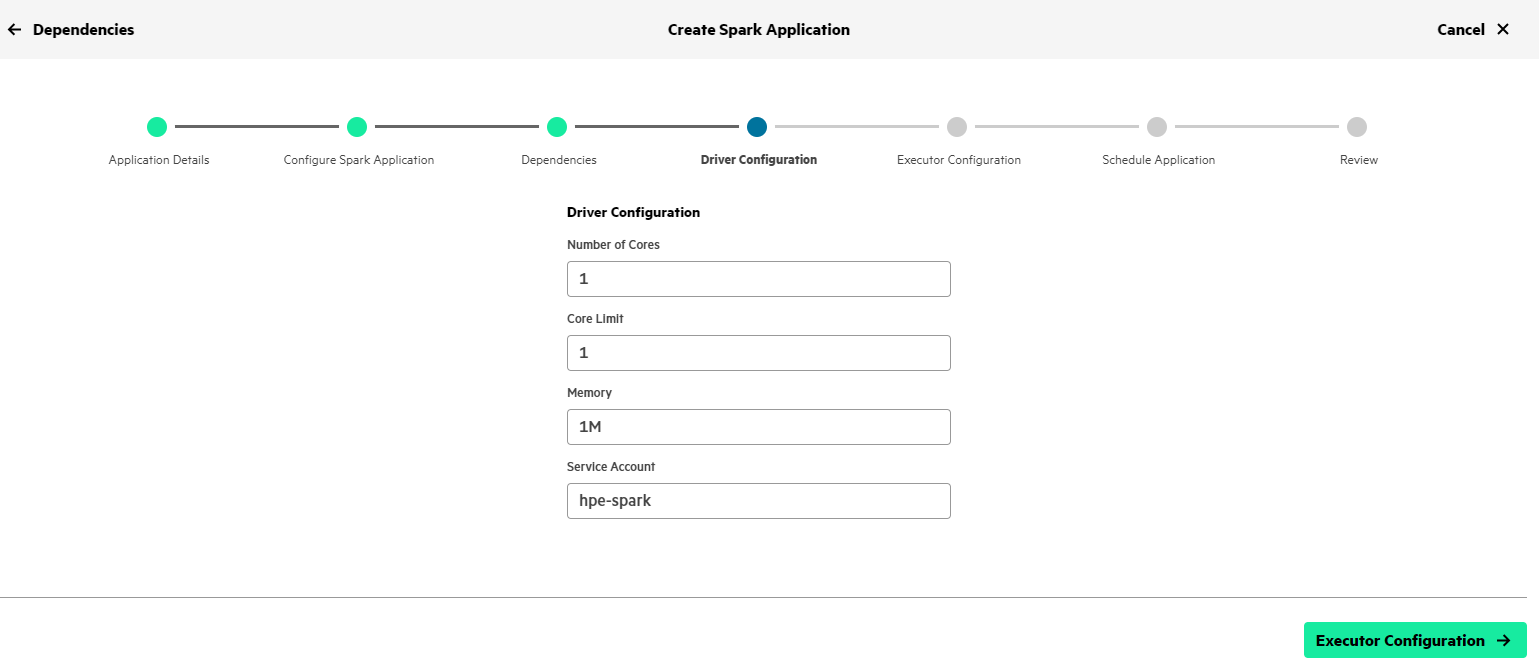
<div class="alert alert-block alert-success">
    <b>Note:</b>  It's important to write M after the amount of memory you request.
    </div>

For the Executor same amount of Cores and Memory should be sufficient, as __Number of Executors__ we enter __2__. 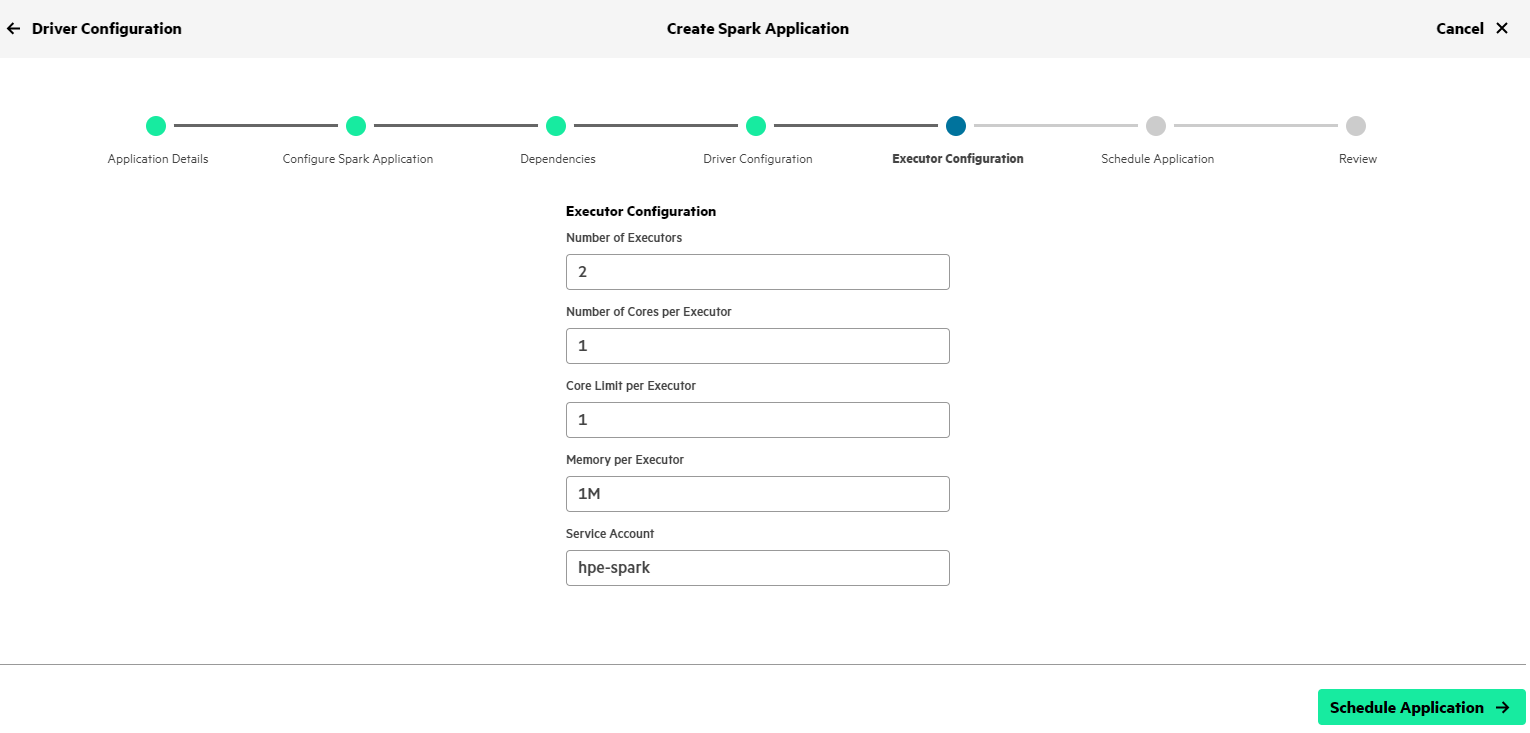

If you toggle Schedule to Run you can enter Frequency Intervals as seen below. 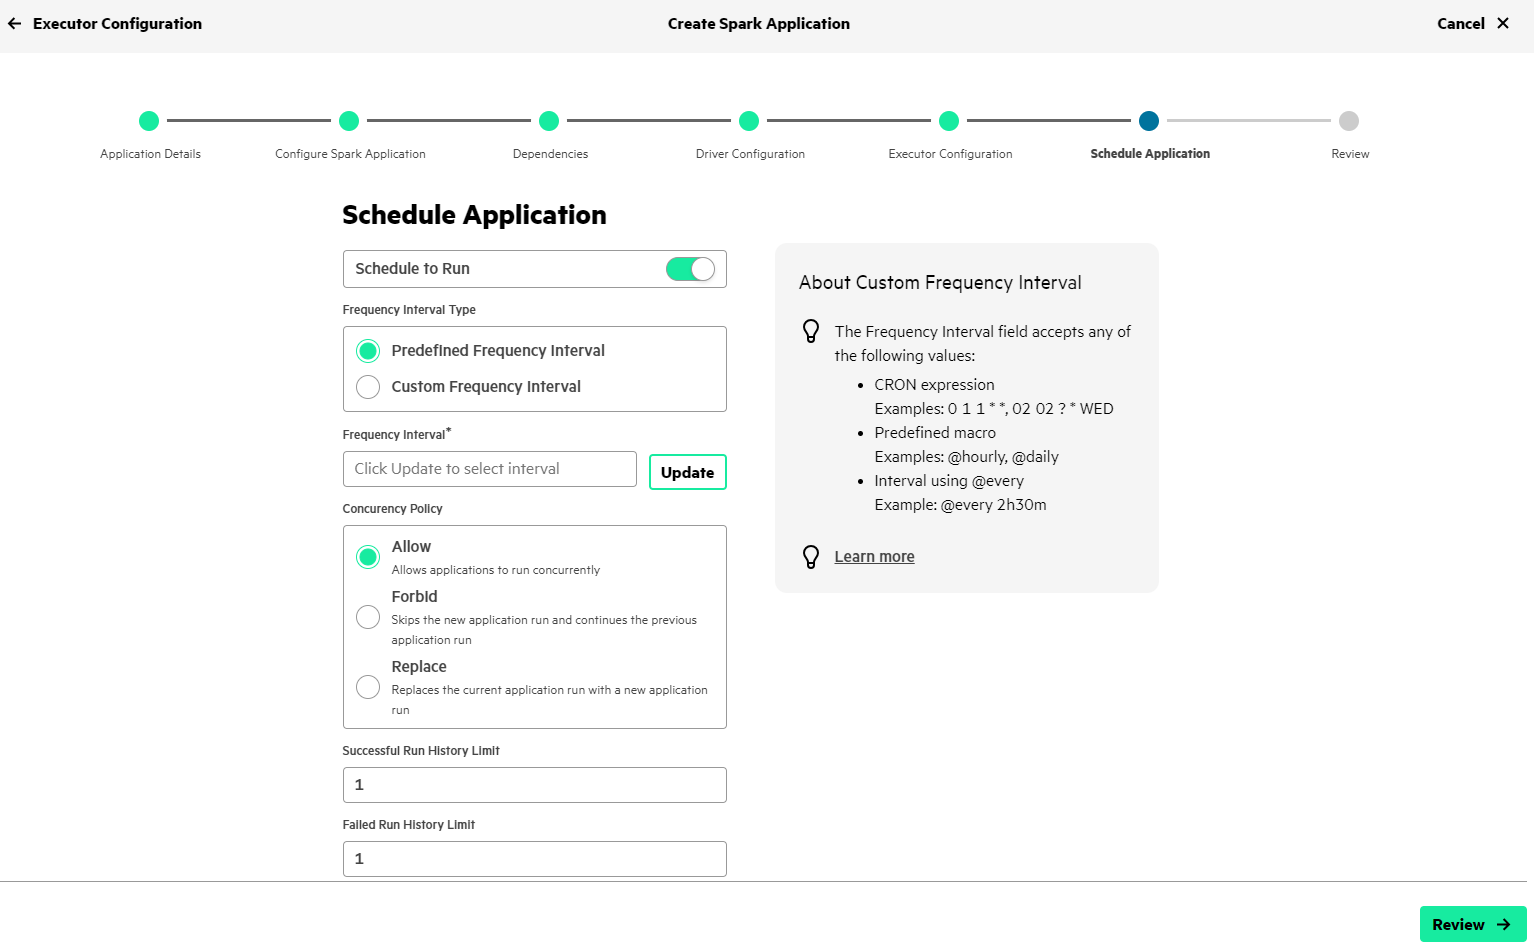

The job is started once after deployment which is enough for our demo purposes, therefore we leave it __Off__!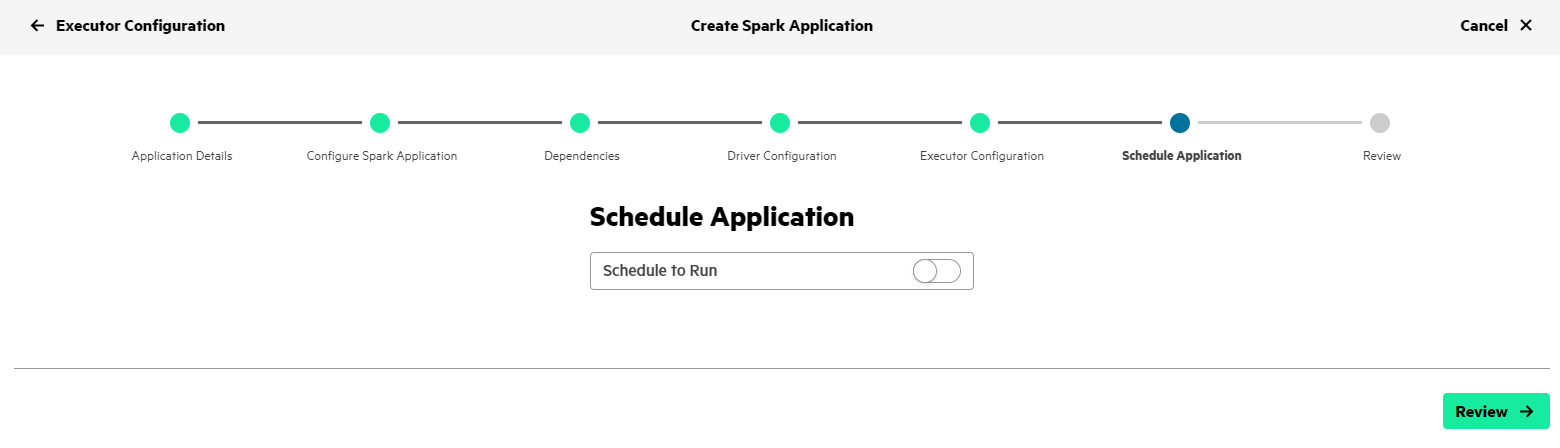

On the last page of the configuration you see an overview of the configuration we just entered and it's possible to make adjustments.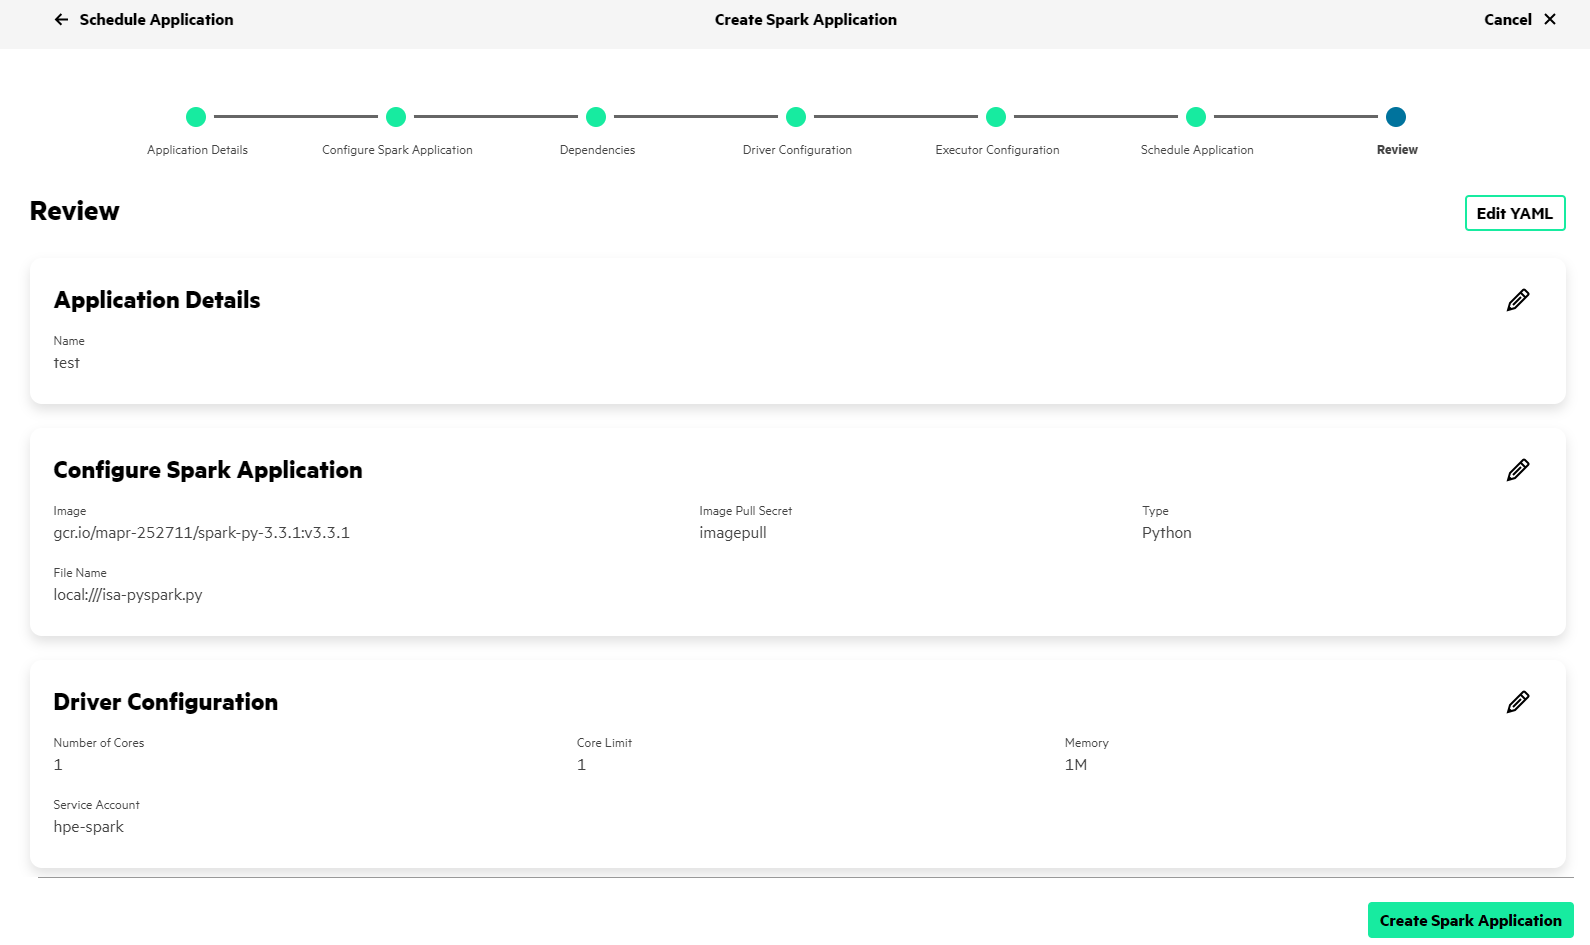

Click on Create Spark Application. This takes a moment. If you want to follow the process you can go to View Logs. 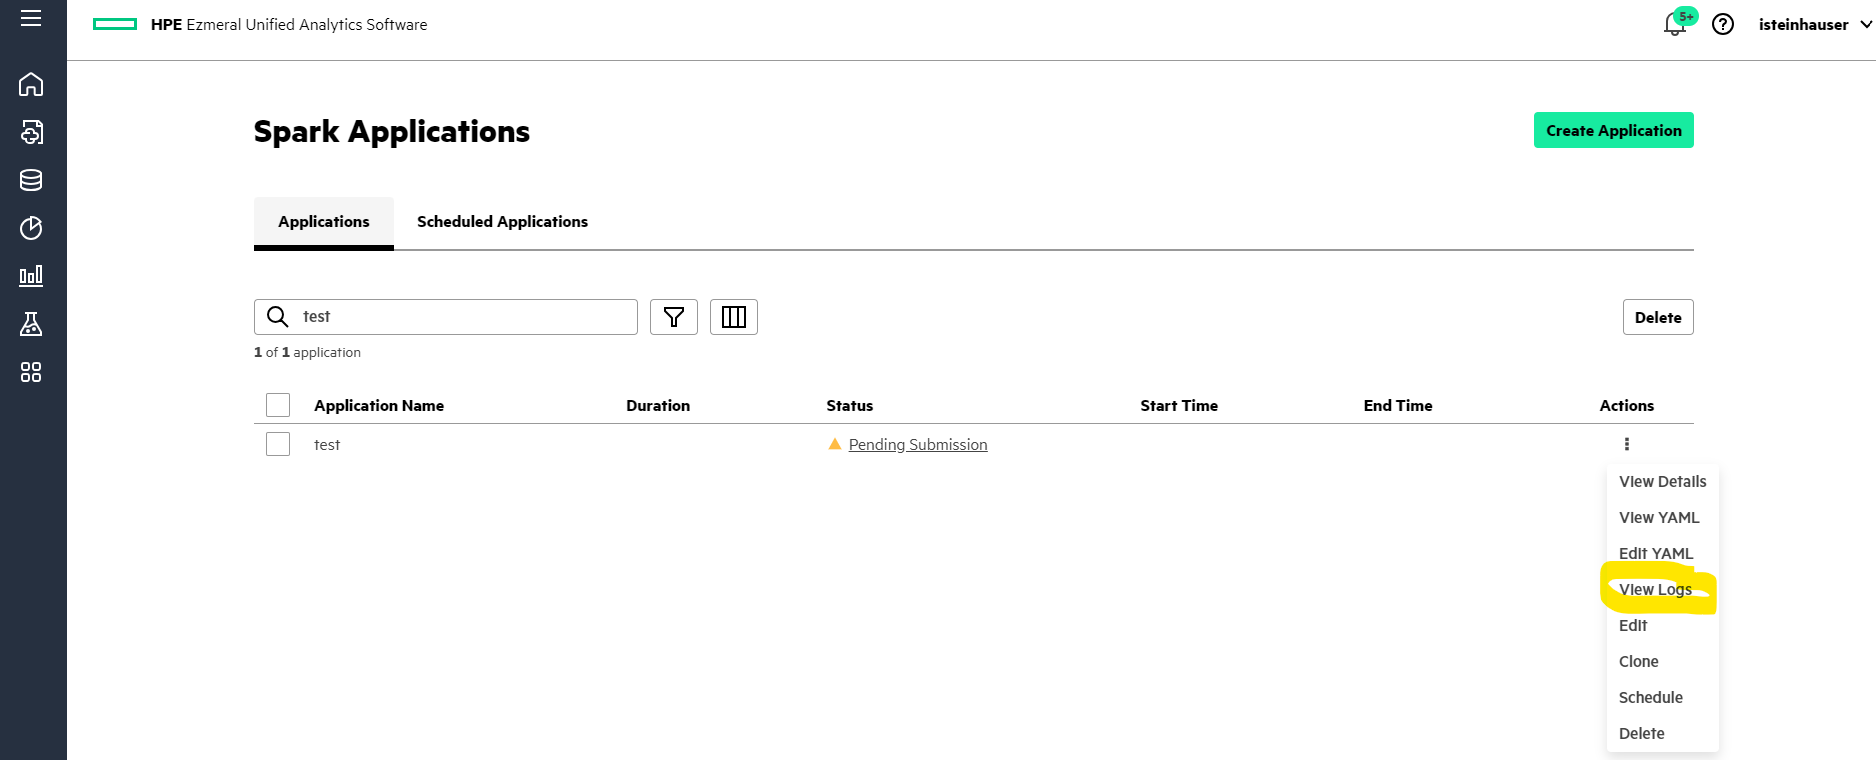

# Video

In [3]:
%%HTML
<video width="1024" height="768" controls>
  <source src="../videos/6-fast.mp4" type="video/mp4">
</video>